<a href="https://colab.research.google.com/github/sailu708d/TEXT-MINING2.ipynb/blob/main/TEXT_MINING2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
* Perform sentimental analysis:
* 1) Extract reviews of any product from ecommerce website like amazon
* 2) Perform emotion mining
1. Import Libraries

In [235]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

2. Multi-page web-scraping

In [236]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


Looping through multiple pages


In [237]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [238]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [239]:
from tqdm import tqdm_notebook
import time

for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    time.sleep(2)  # Introduce a delay of 2 seconds between requests
    if soup.find('li', {'class': 'a-disabled a-last'}) is not None:
        if soup.find('li', {'class': 'a-disabled a-last'}).find('a', {'aria-disabled': 'true'}) is not None:
            break


  0%|          | 0/160 [00:00<?, ?it/s]

Save results to a Dataframe, then export as CSV


In [240]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nExcellent,5.0,Good smart watch. Still working well,Reviewed in India on 26 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
3,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,Reviewed in India on 30 December 2023
4,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,Reviewed in India on 30 November 2023
...,...,...,...,...
105,3.0 out of 5 stars\nGood so far. Will update l...,3.0,Its working well so far.,Reviewed in India on 2 December 2023
106,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,Reviewed in India on 13 September 2023
107,3.0 out of 5 stars\nOk ok,3.0,Touch response is bit latent .,Reviewed in India on 17 November 2023
108,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,Reviewed in India on 21 September 2023


In [241]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)


In [242]:
df.head(50)


,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nExcellent,5.0,Good smart watch. Still working well,26 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
3,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,30 December 2023
4,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,30 November 2023
5,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
6,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",31 October 2023
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023


In [243]:
df.to_csv("BoatSmartWatch_Review.csv")

3. Load Dataset


In [244]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nExcellent,5.0,Good smart watch. Still working well,26 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
3,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,30 December 2023
4,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,30 November 2023
...,...,...,...,...
105,3.0 out of 5 stars\nGood so far. Will update l...,3.0,Its working well so far.,2 December 2023
106,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,13 September 2023
107,3.0 out of 5 stars\nOk ok,3.0,Touch response is bit latent .,17 November 2023
108,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,21 September 2023


4. Data Exploration

In [245]:
reviews.Rating.describe()

count    110.000000
mean       3.881818
std        0.501956
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [246]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [247]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [248]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nExcellent,5.0,Good smart watch. Still working well,26 December 2023
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
3,5.0 out of 5 stars\nGood smart watch,5.0,Like this product,30 December 2023
4,5.0 out of 5 stars\nLena toh boAt hi Lena,5.0,This incident happened on my birthday last mon...,30 November 2023


5. Data Visualization


Date vs Review Count


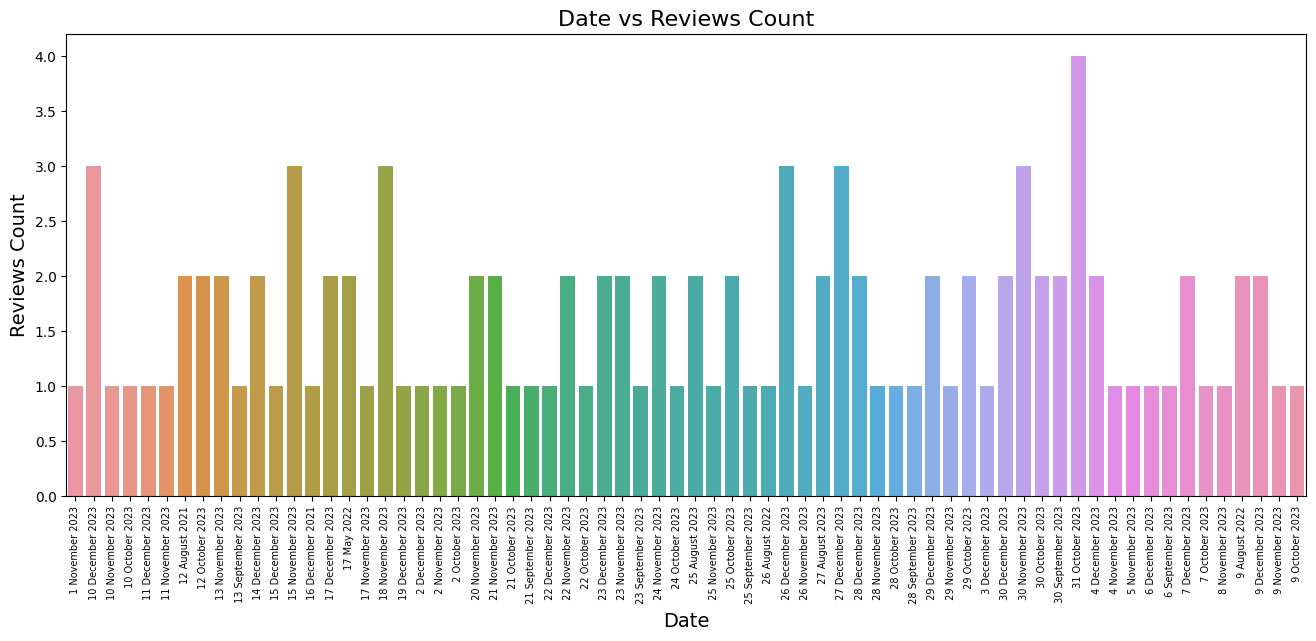

In [249]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

Percentage of Ratings


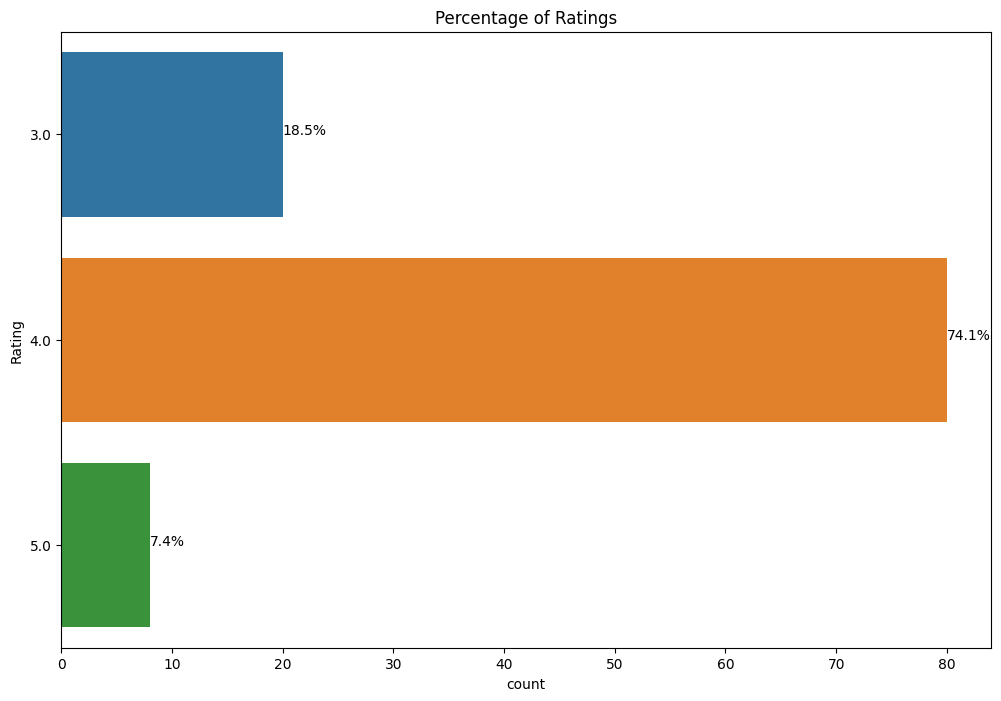

In [250]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


6. BasicText Preprocessing for Sentiment Analysis


Spelling Correction


In [251]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                 Good smart watch. Still working well
1    His smart (model Coat extend plus) watch is sa...
2    The media could not be loaded.\n              ...
3                                    Like this product
4    His incident happened on my birthday last mont...
Name: Review, dtype: object

In [252]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Good smart watch. Still working well
1,This smart (model Boat extend plus) watch is f...
2,The media could not be loaded.\n ...
3,Like this product
4,This incident happened on my birthday last mon...
...,...
105,Its working well so far.
106,beautiful very nice...missing body temperature...
107,Touch response is bit latent .
108,Its been 1 year i buy this watch and i can say...


Resetting index


In [253]:
boat_review.reset_index(drop=True, inplace=True)

In [254]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatizer


In [255]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 0/108 [00:00<?, ?it/s]

In [256]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...


7. Text Pre-processing Techniques


A. Removing '@names'


In [257]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [258]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


B. Removing links (http | https)


In [259]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


C. Removing Review with empty text

In [260]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


D. Dropping duplicate rows

In [261]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


E. Function to remove emoji


In [262]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [263]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


F. Removing Stop words

In [264]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [265]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [266]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,good smart watch still working well,good smart watch. still working well
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
3,like product,like product
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


G. Tokenize 'Clean_Reviews'

In [267]:
import nltk
nltk.download('punkt')
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [268]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0           [good, smart, watch, still, working, well]
1    [smart, model, boat, extend, plus, watch, func...
2    [medium, could, loaded, used, watch, month, bo...
3                                      [like, product]
4    [incident, happened, birthday, last, month, lo...
5    [good, bluetooth, calling, difficult, use, blu...
6    [awesome, design, sound, feature, also, custom...
7    [skipping, part, mostly, covered, review, spon...
8    [review, overviewaverage, boat, today, launche...
9    [drawback, let, know, first, much, st, deliver...
Name: Clean_Reviews, dtype: object

In [269]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,good smart watch still working well,good smart watch. still working well,"[good, smart, watch, still, working, well]"
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
3,like product,like product,"[like, product]"
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...,"[incident, happened, birthday, last, month, lo..."
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza...","[awesome, design, sound, feature, also, custom..."
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."


H. Converting words to Stemmer

In [270]:
stemmer = SnowballStemmer("english")

In [271]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,good smart watch still work well
1,smart model boat extend plus watch function we...
2,medium could load use watch month bought first...
3,like product
4,incid happen birthday last month lost watch pr...
...,...
103,work well far
104,beauti nice miss bodi temperatur let see durab...
105,touch respons bit latent
106,year buy watch say best buy problem occur till...


I. Converting words to Lemma

In [272]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,good smart watch still working well
1,smart model boat extend plus watch functioning...
2,medium could loaded used watch month bought fi...
3,like product
4,incident happened birthday last month lost wat...
...,...
103,working well far
104,beautiful nice missing body temperature let se...
105,touch response bit latent
106,year buy watch say best buy problem occurs til...


8. Basic Feature Extaction

A. Applying bag of Words without N grams

In [273]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
tweets_cv = cv.fit_transform(dataframe.Clean_Reviews)

feature_names = cv.get_feature_names_out()

print(feature_names[109:200])


['believe' 'benefitsnow' 'best' 'better' 'beyond' 'bezel' 'big' 'bike'
 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood' 'bluetooth' 'boat'
 'body' 'bother' 'bought' 'box' 'bp' 'break' 'breath' 'breathing' 'bright'
 'brightness' 'brings' 'brnd' 'broken' 'browsing' 'brushed' 'bt' 'budget'
 'bug' 'build' 'buildi' 'built' 'bulb' 'burn' 'burnt' 'bus' 'button' 'buy'
 'buyer' 'buying' 'cable' 'cache' 'calculated' 'calculating' 'calculation'
 'calculator' 'calender' 'call' 'called' 'caller' 'callin' 'calling'
 'calorie' 'calory' 'cals' 'camera' 'cannot' 'capability' 'carddesign'
 'care' 'case' 'category' 'center' 'centerbefore' 'certain' 'chahiye'
 'chain' 'change' 'changed' 'changer' 'charge' 'charger' 'charging'
 'charm' 'cheap' 'check' 'checked' 'checking' 'chennai' 'childish'
 'chinese' 'choice' 'choor' 'choose' 'claim' 'claimed']


In [274]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
tweets_cv = cv.fit_transform(dataframe.Clean_Reviews)

feature_names = cv.get_feature_names_out()

print(feature_names[:100])


['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'activate' 'activating' 'active' 'activites' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adjust' 'advance'
 'advertised' 'aggregate' 'alarm' 'alert' 'alexa' 'allow' 'allowed'
 'allows' 'almost' 'along' 'also' 'aluminium' 'always' 'amaze' 'amazfit'
 'amazon' 'amoled' 'amount' 'analog' 'android' 'angle' 'animal'
 'animation' 'anniversary' 'another' 'answer' 'anyone' 'anyonefor'
 'anything' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'application'
 'appreciate' 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside' 'asks'
 'aspect' 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'aur' 'auto' 'available' 'average' 'away' 'awesome'
 'back' 'background' 'bad' 'badge' 

In [275]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [276]:
dataframe = dataframe.reset_index(drop=True)

In [277]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [278]:
corpus[3]

'like product'

Applying Countvectorizer (Creating the Bag of Words model)

In [279]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [280]:
X.shape

(106, 1546)

In [281]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
tweets_cv = cv.fit_transform(dataframe.Clean_Reviews)

feature_names = cv.get_feature_names_out()

print(feature_names[:20])


['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'activate' 'activating']


In [282]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [283]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer()
tweets_cv = cv.fit_transform(dataframe.Clean_Reviews)

feature_names = cv.get_feature_names_out()

count_df = pd.DataFrame(tweets_cv.toarray(), columns=feature_names)
count_df


,aaj,able,absolutely,ac,accept,acceptable,acceptance,accepts,access,accidentally,...,yahoo,ye,year,yellow,yes,yet,youtube,yr,yrr,yt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


C. TF-IDF Vectorizer

In [284]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [285]:
corpus[4]

'incid happen birthday last month lost watch preciou girlfriend gift watch birthday last year last month birthday someon stole hostel room thought would use exactli today th found thrown gate hostel date theft also th look condit seem abl use watch due batteri drain definit thought faulti watch tri break watch fail everyth threw watch get wet chennai rain today final got today happi got watch watch absolut safe also turn charg main toh ummid hi choor di thi k ye millega wapi mujh lekin aaj feka hua mila aur work condit mai hai aur kya chahiy thank boat'

Applying TF-IDF Vectorizer

In [286]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [287]:
X.shape

(106, 1546)

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer()
tweets_tfidf = tfidf_v.fit_transform(dataframe.Clean_Reviews)

feature_names = tfidf_v.get_feature_names_out()

print(feature_names[:20])


['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'activate' 'activating']


In [289]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_v = TfidfVectorizer()
tweets_tfidf = tfidf_v.fit_transform(dataframe.Clean_Reviews)

feature_names = tfidf_v.get_feature_names_out()

count_df = pd.DataFrame(tweets_tfidf.toarray(), columns=feature_names)
count_df

,aaj,able,absolutely,ac,accept,acceptable,acceptance,accepts,access,accidentally,...,yahoo,ye,year,yellow,yes,yet,youtube,yr,yrr,yt
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.045918,0.000000,...,0.0,0.000000,0.000000,0.0,0.088546,0.056357,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.035964,0.0,0.0,0.0,0.0,0.000000,0.035964,...,0.0,0.000000,0.000000,0.0,0.028253,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.093154,0.093154,0.087295,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.087295,0.082751,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
102,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
103,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
104,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.310116,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


D. Named Entity Recognition (NER)

In [291]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'good smart watch still working well smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain time display good number display available cloud sufficient always feature working model available feature pleasing could skin made available display wrist put rest raise respectively feature functional feature always enabled other

Parts Of Speech (POS) Tagging

In [292]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [293]:
for token in doc_block[:50]:
    print(token,token.pos_)

good ADJ
smart ADJ
watch NOUN
still ADV
working VERB
well ADV
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB
functioning VERB
well ADV
worth ADJ
price NOUN
r NOUN
battery NOUN
beginning NOUN
lasted VERB
day NOUN
next ADJ
charge NOUN
lasted VERB
day NOUN
last ADV
settled VERB
one NUM
day NOUN
extensive ADJ
user NOUN
apps NOUN
amoled VERB
display NOUN
good ADJ
touch NOUN
feature VERB
good ADJ
access NOUN
apps NOUN
easily ADV
reachable ADJ
simple ADJ
browsing VERB
feature NOUN
sleep NOUN
measurement NOUN
good ADJ
taking NOUN
day NOUN


Filtering the nouns and verbs only


In [294]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'medium', 'loaded', 'watch', 'month', 'bought', 'sale', 'keep', 'reading', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'display', 'price', 'category', 'inch', 'battery', 'usage', 'waking', 'screen', 'alarm', 'notification', 'day', 'checking', 'time', 'day', 'charging', 'time', 'hour', 'quality', 'charging', 'cable', 'provided', '

Counting the noun & verb tokens


In [295]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,188
1,boat,89
2,feature,77
3,time,63
4,day,54
5,smartwatch,48
6,display,44
7,use,44
8,xtend,44
9,app,40


Visualizing results (Barchart for top 10 nouns + verbs)

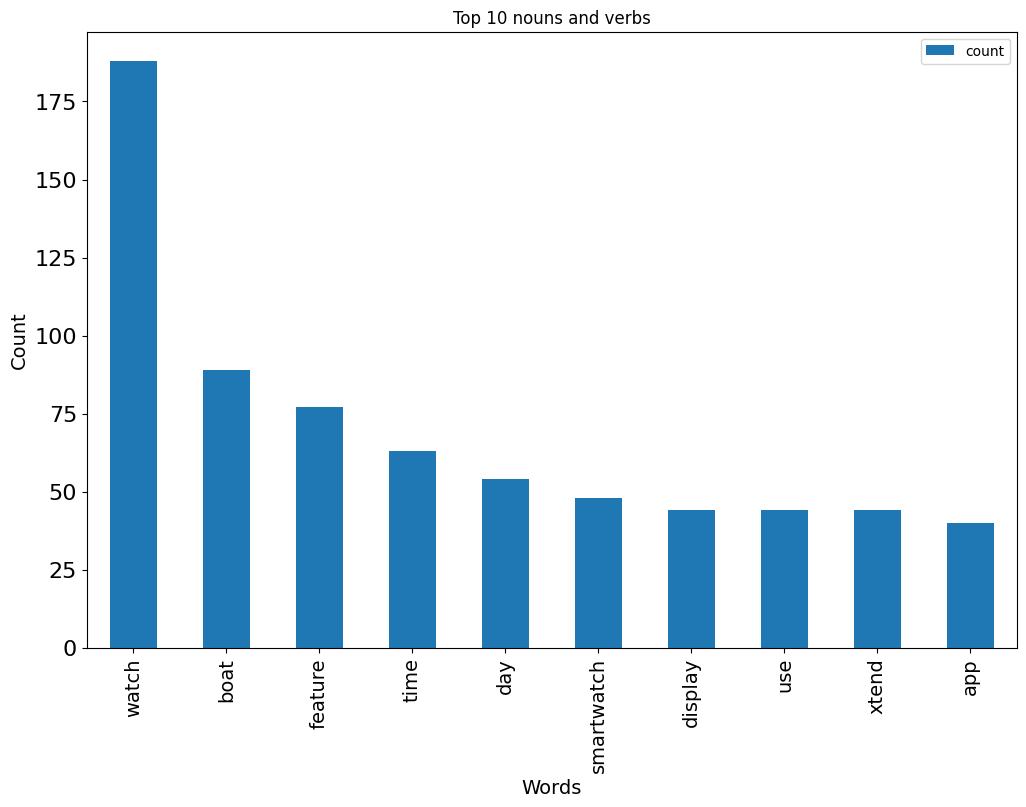

In [296]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

9. Feature Extraction


9. Feature Extraction


In [297]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


B. TF-IDF Features


In [298]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


10. Fetch sentiments Using TextBlob

In [299]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'


In [300]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,101
neg,5


Let's calculate subjectivity and Polarity


In [301]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,good smart watch still working well,good smart watch. still working well,"[good, smart, watch, still, working, well]",0.621429,0.457143
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
3,like product,like product,"[like, product]",0.000000,0.000000
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...,"[incident, happened, birthday, last, month, lo...",0.526923,0.217308


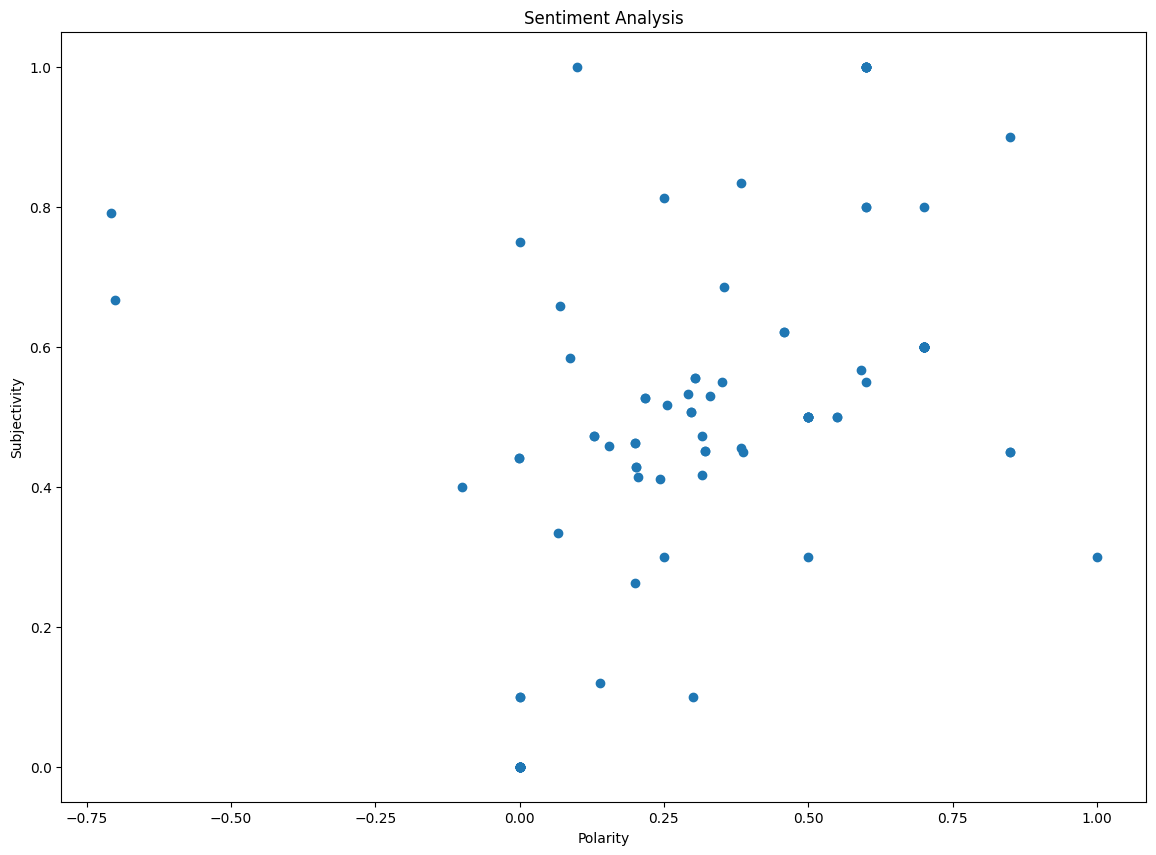

In [302]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [303]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,good smart watch still working well,good smart watch. still working well,"[good, smart, watch, still, working, well]",0.621429,0.457143,pos
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
3,like product,like product,"[like, product]",0.000000,0.000000,pos
4,incident happened birthday last month lost wat...,this incident happened birthday last month i l...,"[incident, happened, birthday, last, month, lo...",0.526923,0.217308,pos


11. Story Generation and Visualization


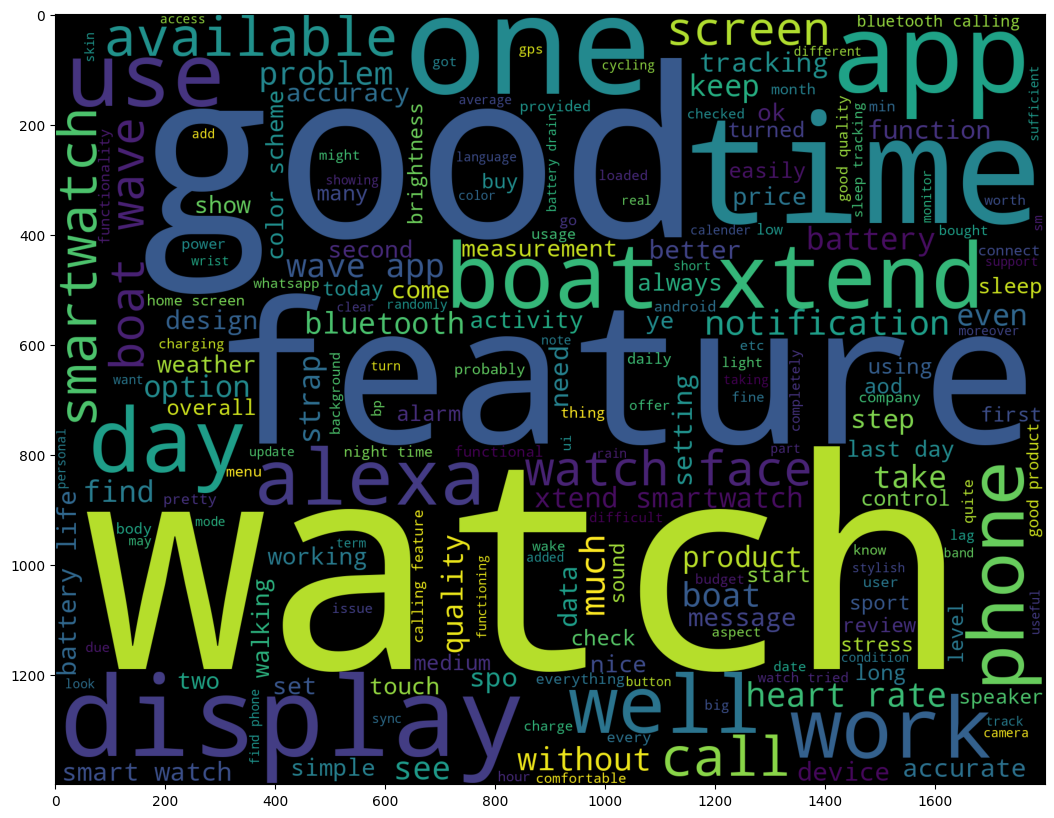

In [304]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

A. Most common words in positive Review

In [305]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

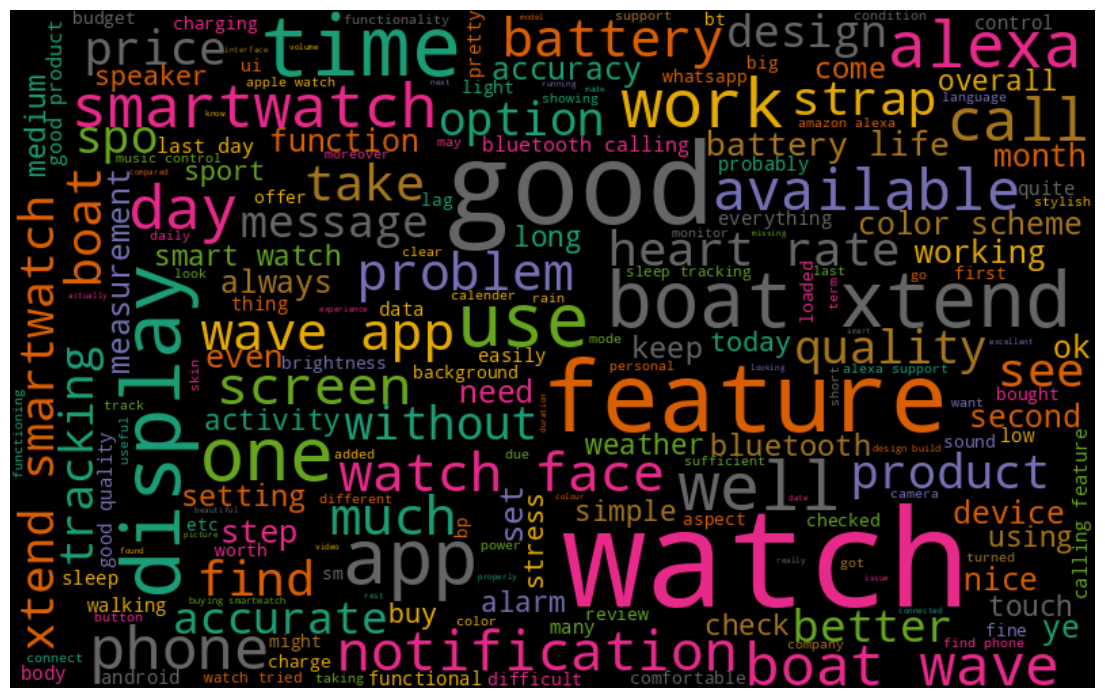

In [306]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

B. Most common words in negative Review


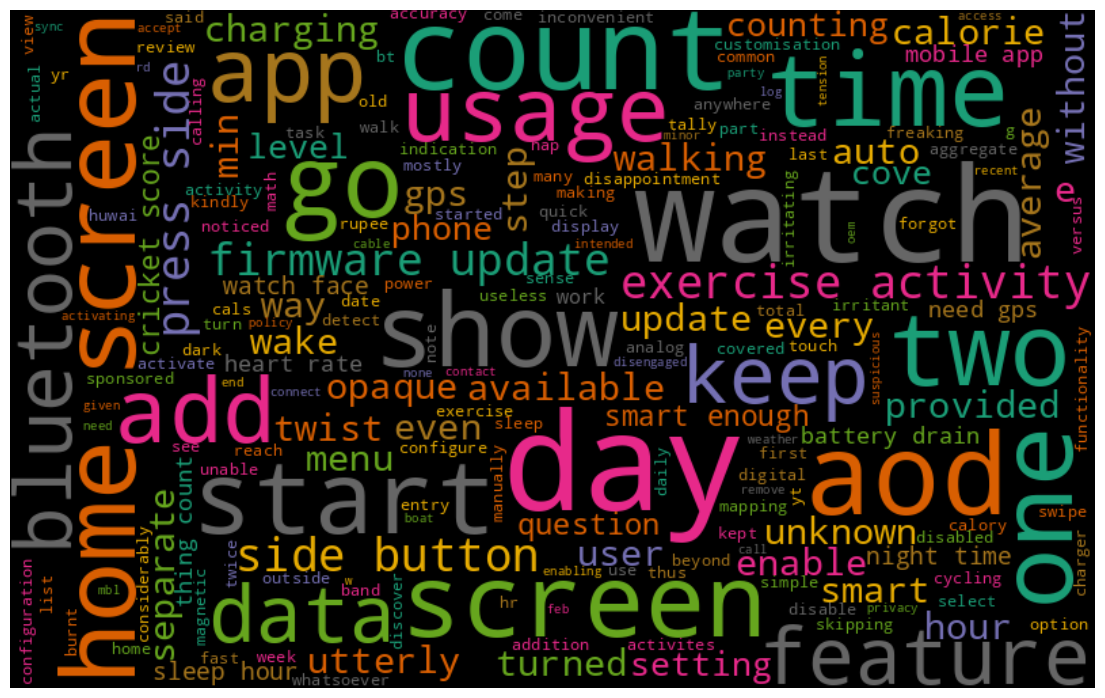

In [307]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)